<a href="https://colab.research.google.com/github/TReV-89/TReV-89/blob/main/LanguuageID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import json as js
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt


In [2]:
with open("/salt-dev-v1.1.jsonl") as f:
    lines = f.read().splitlines()
df_inter = pd.DataFrame(lines)
df_inter.columns = ['json_element']
df = pd.json_normalize(df_inter['json_element'].apply(js.loads))

In [15]:
df["text.eng"] = 1
df["text.lug"] = 2
df["text.ach"] = 3
df["text.teo"] = 4
df["text.lgg"] = 5
df["text.nyn"] = 6

In [16]:
train_dataset = df.sample(frac = 0.75, random_state = 1)
train_dataset.head()

,text.eng,text.lug,text.ach,text.teo,text.lgg,text.nyn
304,1,2,3,4,5,6
340,1,2,3,4,5,6
47,1,2,3,4,5,6
67,1,2,3,4,5,6
479,1,2,3,4,5,6


In [17]:
valid_dataset = df.drop(train_dataset.index)

In [18]:
def create_model(my_inputs, my_learning_rate, METRICS):
  concatenated_inputs = tf.keras.layers.Concatenate()(my_inputs.values())
  dense = layers.Dense(units=1, input_shape=(1,),name='dense_layer', activation=tf.sigmoid)
  dense_output = dense(concatenated_inputs)
  my_outputs = {
    'dense': dense_output,
  }
  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=METRICS)
  return model

def train_model(model, dataset, epochs, label_name,
                batch_size=None, shuffle=True):
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=shuffle)
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist

In [21]:
def plot_curve(epochs, hist, list_of_metrics):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")
  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)
  plt.legend()

In [22]:
inputs = {
  'text.lug': tf.keras.Input(shape=(1,)),
  'text.ach': tf.keras.Input(shape=(1,)),
  'text.teo': tf.keras.Input(shape=(1,)),
  'text.lgg': tf.keras.Input(shape=(1,)),
  'text.nyn': tf.keras.Input(shape=(1,)),
}


Epoch 1/20
19/19 [==============================] - 0s 1ms/step - loss: 4.0721 - accuracy: 0.0000e+00
Epoch 2/20
19/19 [==============================] - 0s 1ms/step - loss: 0.7995 - accuracy: 0.7867
Epoch 3/20
19/19 [==============================] - 0s 1ms/step - loss: 0.1412 - accuracy: 1.0000
Epoch 4/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 1.0000
Epoch 5/20
19/19 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 1.0000
Epoch 6/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 7/20
19/19 [==============================] - 0s 1ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 8/20
19/19 [==============================] - 0s 1ms/step - loss: 7.7048e-04 - accuracy: 1.0000
Epoch 9/20
19/19 [==============================] - 0s 1ms/step - loss: 2.9830e-04 - accuracy: 1.0000
Epoch 10/20
19/19 [==============================] - 0s 2ms/step - loss: 1.1633e-04 - accuracy: 1.0000
Epo

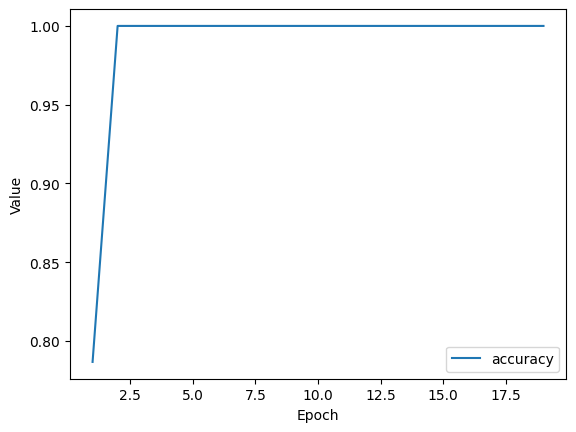

In [25]:
learning_rate = 0.01
epochs = 20
batch_size = 20
label_name = "text.eng"
classification_threshold = 0.3

METRICS = [
           tf.keras.metrics.BinaryAccuracy(name='accuracy',
                                           threshold=classification_threshold),
          ]

my_model = create_model(inputs, learning_rate, METRICS)
epochs, hist = train_model(my_model, train_dataset, epochs,
                           label_name, batch_size)

list_of_metrics_to_plot = ['accuracy']

plot_curve(epochs, hist, list_of_metrics_to_plot)

In [26]:
features = {name:np.array(value) for name, value in valid_dataset.items()}
label = np.array(features.pop(label_name))

my_model.evaluate(x = features, y = label, batch_size=batch_size)

7/7 [==============================] - 0s 3ms/step - loss: 1.9781e-06 - accuracy: 1.0000


[1.9781441551458556e-06, 1.0]